In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



In [55]:
data = pd.read_csv( "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip)



In [56]:
data


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [57]:
print("Dataset Overview:")

Dataset Overview:


In [58]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None


In [59]:
print("\nFirst few rows of the dataset:")


First few rows of the dataset:


In [60]:
print(data.head())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


In [61]:
print("\nSummary Statistics:")


Summary Statistics:


In [62]:
print(data.describe())

                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000

In [63]:
print("\nMissing Values:")


Missing Values:


In [64]:
print(data.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


In [65]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

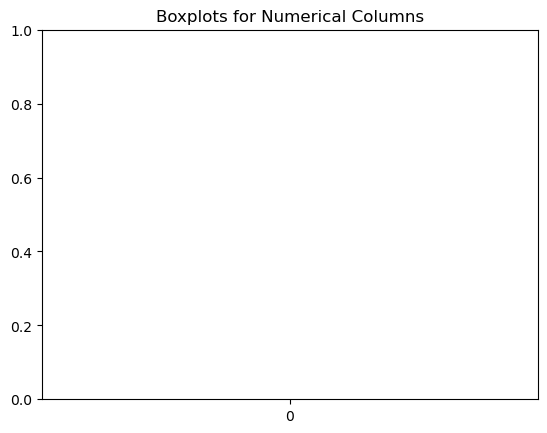

In [66]:
sns.boxplot(d1=data.drop(['W'], axis=1))
plt.title("Boxplots for Numerical Columns")
plt.show()
X = data.drop('W', axis=1)
y = data['W']

In [67]:
print("\nUpdated Dataset:")


Updated Dataset:


In [68]:
print("Features (X):")

Features (X):


In [69]:
print(X.head())

     R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV  \
0  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8  56   
1  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12  45   
2  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10  38   
3  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9  37   
4  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12  35   

     E  
0   88  
1   86  
2   79  
3  101  
4   86  


In [70]:
print("\nTarget Variable (y):")


Target Variable (y):


In [71]:
print(y.head())

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64


In [72]:
correlation_matrix = data.corr()

In [73]:
correlation_with_target = correlation_matrix['W'].sort_values(ascending=False)

In [74]:
print("Correlation with Target Variable (W):")

Correlation with Target Variable (W):


In [75]:
print(correlation_with_target)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64


In [76]:
important_features = correlation_with_target[abs(correlation_with_target) > 0.2].index

In [77]:
print("\nSelected Important Features:")
print(important_features)


Selected Important Features:
Index(['W', 'SV', 'BB', 'SHO', 'R', '2B', 'HR', '3B', 'ER', 'RA', 'ERA'], dtype='object')


In [78]:
data['Run_Ratio'] = data['R'] / data['RA']

In [79]:
print("\nUpdated Dataset with Engineered Feature:")
print(data.head())


Updated Dataset with Engineered Feature:
    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  Run_Ratio  
0  56   88   1.129485  
1  45   86   0.994286  
2  38   79   1.045313  
3  37  101   0.887304  
4  35   86   0.858032  


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
def evaluate_model(predictions, actual):
    mae = mean_absolute_error(actual, predictions)
    mse = mean_squared_error(actual, predictions)
    r2 = r2_score(actual, predictions)
    return mae, mse, r2
linear_reg_metrics = evaluate_model(linear_reg_predictions, y_test)


In [81]:
print("Linear Regression Metrics:")


Linear Regression Metrics:


In [82]:
print("Mean Absolute Error:", linear_reg_metrics[0])


Mean Absolute Error: 3.892999136999684


In [83]:
print("Mean Squared Error:", linear_reg_metrics[1])


Mean Squared Error: 27.94303250666688


In [84]:
print("R-squared:", linear_reg_metrics[2])


R-squared: 0.7876400316149446


In [86]:
dt_metrics = evaluate_model(dt_predictions, y_test)


In [87]:
print("\nDecision Tree Metrics:")
print("Mean Absolute Error:", dt_metrics[0])
print("Mean Squared Error:", dt_metrics[1])
print("R-squared:", dt_metrics[2])



Decision Tree Metrics:
Mean Absolute Error: 6.666666666666667
Mean Squared Error: 75.33333333333333
R-squared: 0.42748575047498416


In [88]:
rf_metrics = evaluate_model(rf_predictions, y_test)
print("\nRandom Forest Metrics:")
print("Mean Absolute Error:", rf_metrics[0])
print("Mean Squared Error:", rf_metrics[1])
print("R-squared:", rf_metrics[2])



Random Forest Metrics:
Mean Absolute Error: 5.735000000000002
Mean Squared Error: 51.967916666666675
R-squared: 0.6050569981000633


In [89]:
gb_metrics = evaluate_model(gb_predictions, y_test)
print("\nGradient Boosting Metrics:")
print("Mean Absolute Error:", gb_metrics[0])
print("Mean Squared Error:", gb_metrics[1])
print("R-squared:", gb_metrics[2])



Gradient Boosting Metrics:
Mean Absolute Error: 5.980689066453098
Mean Squared Error: 47.69939359453528
R-squared: 0.6374966921251277


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
linear_reg_metrics = evaluate_model(linear_reg_predictions, y_test)
print("Linear Regression Metrics:")
print("Mean Absolute Error:", linear_reg_metrics[0])
print("Mean Squared Error:", linear_reg_metrics[1])

Linear Regression Metrics:
Mean Absolute Error: 3.892999136999684
Mean Squared Error: 27.94303250666688


In [91]:
print("R-squared:", linear_reg_metrics[2])
dt_metrics = evaluate_model(dt_predictions, y_test)
print("\nDecision Tree Metrics:")
print("Mean Absolute Error:", dt_metrics[0])
print("Mean Squared Error:", dt_metrics[1])
print("R-squared:", dt_metrics[2])


R-squared: 0.7876400316149446

Decision Tree Metrics:
Mean Absolute Error: 6.666666666666667
Mean Squared Error: 75.33333333333333
R-squared: 0.42748575047498416


In [92]:
rf_metrics = evaluate_model(rf_predictions, y_test)
print("\nRandom Forest Metrics:")
print("Mean Absolute Error:", rf_metrics[0])
print("Mean Squared Error:", rf_metrics[1])
print("R-squared:", rf_metrics[2])



Random Forest Metrics:
Mean Absolute Error: 5.735000000000002
Mean Squared Error: 51.967916666666675
R-squared: 0.6050569981000633


In [93]:
gb_metrics = evaluate_model(gb_predictions, y_test)
print("\nGradient Boosting Metrics:")
print("Mean Absolute Error:", gb_metrics[0])
print("Mean Squared Error:", gb_metrics[1])
print("R-squared:", gb_metrics[2])



Gradient Boosting Metrics:
Mean Absolute Error: 5.980689066453098
Mean Squared Error: 47.69939359453528
R-squared: 0.6374966921251277


In [94]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [95]:
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:")
print(grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_metrics = evaluate_model(best_rf_predictions, y_test)
print("\nBest Random Forest Model Metrics:")
print("Mean Absolute Error:", best_rf_metrics[0])
print("Mean Squared Error:", best_rf_metrics[1])
print("R-squared:", best_rf_metrics[2])

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Random Forest Model Metrics:
Mean Absolute Error: 6.006666666666668
Mean Squared Error: 58.03666666666668
R-squared: 0.5589360354654844
